In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import os
import sys
import pandas as pd
import time
import tensorflow as tf
from tensorflow import keras

print(sys.version_info)
for module in mpl,np, sklearn,pd,tf,keras:
    print(module.__name__,module.__version__)

sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)
matplotlib 3.1.0
numpy 1.16.4
sklearn 0.21.2
pandas 0.24.2
tensorflow 2.0.0-alpha0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [4]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

I0612 18:19:09.253536  7968 california_housing.py:114] Downloading Cal. housing from https://ndownloader.figshare.com/files/5976036 to C:\Users\ZSZ\scikit_learn_data


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [5]:
import pprint

pprint.pprint(housing.data[0:5])
pprint.pprint(housing.target[0:5])

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])
array([4.526, 3.585, 3.521, 3.413, 3.422])


In [6]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 1    #,test_size = 0.25   default, 3:1
)

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 2)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [10]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu',
                      input_shape = x_train.shape[1:]),
    keras.layers.Dense(1),
])

model.summary()
model.compile(loss='mean_squared_error', optimizer='sgd')
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)]


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(x_train_scaled, y_train,
                   validation_data = (x_valid_scaled, y_valid),
                   epochs = 100,
                   callbacks = callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 207us/sample - loss: 1.8772 - val_loss: 0.8834
Epoch 2/100
11610/11610 [==============================] - 2s 140us/sample - loss: 0.8123 - val_loss: 0.7207
Epoch 3/100
11610/11610 [==============================] - 2s 138us/sample - loss: 0.7075 - val_loss: 0.6741
Epoch 4/100
11610/11610 [==============================] - 2s 138us/sample - loss: 0.6634 - val_loss: 0.6387
Epoch 5/100
11610/11610 [==============================] - 2s 136us/sample - loss: 0.6301 - val_loss: 0.6106
Epoch 6/100
11610/11610 [==============================] - 2s 141us/sample - loss: 0.6032 - val_loss: 0.5880
Epoch 7/100
11610/11610 [==============================] - 2s 137us/sample - loss: 0.5815 - val_loss: 0.5693
Epoch 8/100
11610/11610 [==============================] - 2s 138us/sample - loss: 0.5636 - val_loss: 0.5537
Epoch 9/100
11610/11610 [==============================] - 2s 144us/sample - lo

11610/11610 [==============================] - 2s 135us/sample - loss: 0.4134 - val_loss: 0.4149
Epoch 76/100
11610/11610 [==============================] - 2s 130us/sample - loss: 0.4126 - val_loss: 0.4143
Epoch 77/100
11610/11610 [==============================] - 2s 130us/sample - loss: 0.4121 - val_loss: 0.4132
Epoch 78/100
11610/11610 [==============================] - 1s 129us/sample - loss: 0.4113 - val_loss: 0.4133
Epoch 79/100
11610/11610 [==============================] - 1s 128us/sample - loss: 0.4112 - val_loss: 0.4126
Epoch 80/100
11610/11610 [==============================] - 2s 141us/sample - loss: 0.4105 - val_loss: 0.4120
Epoch 81/100
11610/11610 [==============================] - 2s 130us/sample - loss: 0.4101 - val_loss: 0.4117
Epoch 82/100
11610/11610 [==============================] - 1s 129us/sample - loss: 0.4094 - val_loss: 0.4111
Epoch 83/100
11610/11610 [==============================] - 1s 128us/sample - loss: 0.4089 - val_loss: 0.4107
Epoch 84/100
11610/1161

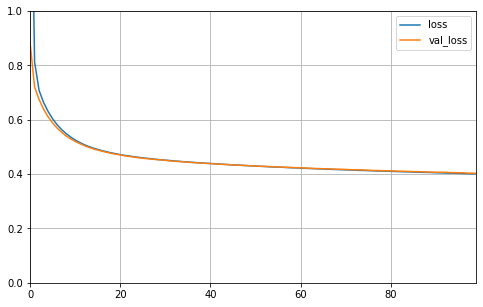

In [12]:
def plot_learnig_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learnig_curves(history)

In [13]:
model.evaluate(x_test_scaled, y_test)

5160/5160 [==============================] - 0s 78us/sample - loss: 0.4291


0.4291273984798165